In [2]:
!pip install ultralytics opencv-python-headless pillow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00


> "Since our prototype uses pre-recorded videos, we simulate timestamps using Python’s datetime module. In live CCTV integrations, this would be replaced with actual frame capture timestamps synced with system time."

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import zipfile

zip_path = '/content/drive/MyDrive/HACKATHON/Bago_urban_28.zip'
extract_path = '/content/Bago_urban_28/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Extracted videos to:", extract_path)


 Extracted videos to: /content/Bago_urban_28/


Total images: 100


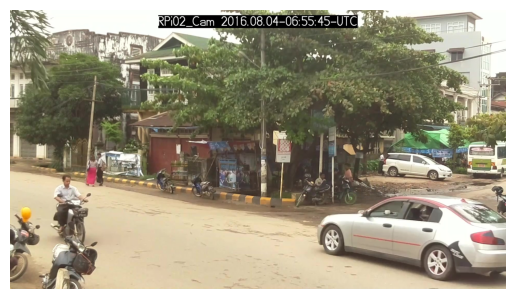

In [8]:
import glob
import cv2
import matplotlib.pyplot as plt

image_paths = glob.glob("/content/Bago_urban_28/Bago_urban_28/Bago_urban_28/*.jpg") # Adjust extension if needed

print("Total images:", len(image_paths))

# Visualize first image
img = cv2.imread(image_paths[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis(False)
plt.show()


In [11]:
def enhance_color_frame(frame):
    b, g, r = cv2.split(frame)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    b_clahe = clahe.apply(b)
    g_clahe = clahe.apply(g)
    r_clahe = clahe.apply(r)
    enhanced = cv2.merge((b_clahe, g_clahe, r_clahe))
    return cv2.resize(enhanced, (416, 416))


In [10]:
import cv2
import os
import glob

input_folder = "/content/Bago_urban_28/Bago_urban_28"
output_folder = "/content/enhanced_images"
os.makedirs(output_folder, exist_ok=True)


In [12]:
image_paths = glob.glob(os.path.join(input_folder, "*.jpg"))

for img_path in image_paths:
    img = cv2.imread(img_path)
    if img is not None:
        enhanced = enhance_color_frame(img)
        filename = os.path.basename(img_path)
        out_path = os.path.join(output_folder, f"enhanced_{filename}")
        cv2.imwrite(out_path, enhanced)

print(f" Enhanced images saved to: {output_folder}")

 Enhanced images saved to: /content/enhanced_images


In [14]:
import shutil

# Zip the folder (change folder name if needed)
shutil.make_archive("color_frames_2", 'zip', "/content/enhanced_images")


'/content/color_frames_2.zip'

In [15]:
from google.colab import files

# Start download
files.download("color_frames_2.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>